In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import math
from datetime import datetime 
import hashlib
import time
from email.message import EmailMessage
import sys
import os
import matplotlib.pyplot as plt
path = os.getcwd()
pathing = sys.path.append(path)
sys.path.append(os.path.abspath('.')) 

# from internal_modules.email import send_email
# from internal_modules.email import sent

In [3]:
aces_individual = 'https://www.ncaa.com/stats/volleyball-men/d1/current/individual/532'

In [4]:
service = requests.get(aces_individual)

In [5]:
collecting = service.content
information_aces = BeautifulSoup(collecting, 'html.parser')
information_aces.prettify()

date_updated = '<em class="placeholder">Monday, January 27, 2025 8:08 am</em>'

In [20]:
def last_update():
    try:
        url_aces = 'https://www.ncaa.com/stats/volleyball-men/d1/current/individual/532'
        service = requests.get(url_aces)
        collecting = service.content
        information_aces = BeautifulSoup(collecting, 'html.parser')
        most_recent_date = information_aces.find_all('em')[1].text.strip()
        if len(most_recent_date) <= 1:
            return f'There has been an issue with the retrieving of the data. Contact the Author to resolve the issue.'
        else:
            time_stamp = datetime.strptime(most_recent_date, "%A, %B %d, %Y %I:%M %p")  
            return time_stamp
    except Exception as error:
        return f'There was an error at {error}, solve it to be able to parse the last updated date.'

updated = last_update()

def checking_update():
    last_known_update = updated  
    if not last_known_update:
        print(f'There has been an issue retrieving the last known update. Closing.')
        return None
    print(f'Process to check if there was an update has begun.')

    while True:
        try:
            start_time = time.time()
            
            time.sleep(604800)  
            
            print("Fetching current update timestamp...")
            current_update = updated
            
            end_time = time.time()
            elapsed_time = end_time - start_time
            
            if not current_update:
                print(f"Failed to fetch the current update time. Elapsed time: {elapsed_time:.2f} seconds. Retrying...")
            if current_update != last_known_update:
                print(f"The monitored part of the website has been updated! Elapsed time: {elapsed_time:.2f} seconds.")
                last_known_update = current_update
                break
            else:
                print(f"No update detected. Still monitoring. Elapsed time: {elapsed_time:.2f} seconds.")
        except KeyboardInterrupt:
            print("Monitoring stopped.")
        except Exception as e:
            print(f"An error occurred during monitoring: {e}")
            

            

In [22]:
def last_update():
    last_updated = information_aces.find_all('em')[0]
    most_recent_date = information_aces.find_all('em')[1].text.strip()
    most_recent_date
    time_stamp = datetime.strptime(most_recent_date, "%A, %B %d, %Y %I:%M %p") 
    print(f'The last time this website was updated was at {time_stamp}')
    return time_stamp


print(last_update())

The last time this website was updated was at 2025-04-28 09:04:00
2025-04-28 09:04:00


In [24]:
# in order to make the data frame we want to make, we will need to find all the headers and columns we were using earlier
columns_aces = information_aces.find('tr').text
columns_aces = columns_aces.replace('\n',' ').strip().split()
df = pd.DataFrame(columns = columns_aces)
df['Per Set'] = df['Per'].astype(str) + df['Set'].astype(str)
df = df.drop(['Per','Set'], axis = 1)

In [28]:
# putting everything all together

table_data = information_aces.find_all('tr')

valid_ranking = 0

for item in table_data[1:]:
    vb = item.find_all('td')
    pieced = [info.text.strip() for info in vb]
    if pieced[0] == '-':
        valid_ranking += 1
        pieced[0] = str(valid_ranking)
    else:
        valid_ranking= int(pieced[0])
    length = len(df)
    df.loc[length] = pieced


# changing the data types
df['S'] = df['S'].astype(int)
df['Aces'] = df['Aces'].astype(int)
df['Per Set'] = df['Per Set'].astype(float)
df['Rank'] = df['Rank'].astype(int)

Text(0.5, 1.0, 'Top 5 Servers from NCAA Season')

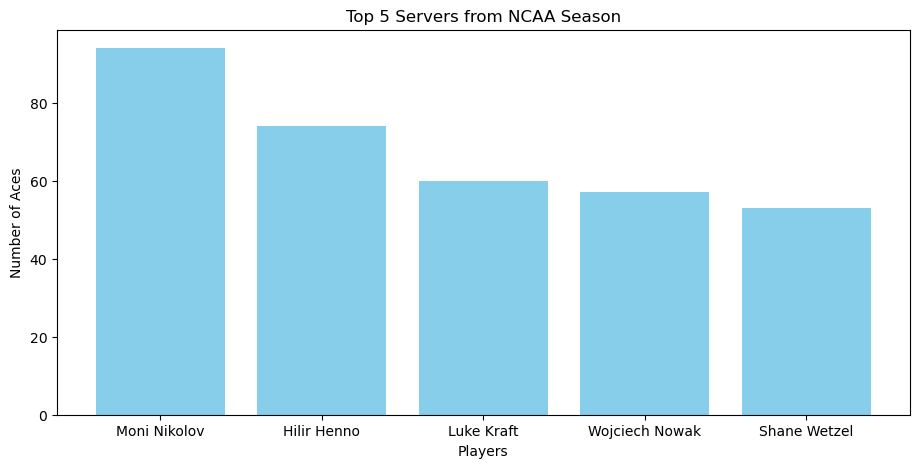

In [94]:
df =  df.drop_duplicates()

top_five_df = df[df['Team'].isin(['BYU', 'Hawaii','Long Beach St.', 'UCLA', 'UC Irvine'])]

top_servers = df.sort_values(by = ['Aces','Per Set'] , ascending = [False, True])


top_5_servers = top_servers.head(5)

plt.figure(figsize=(11, 5))
plt.bar(top_5_servers['Name'], top_5_servers['Aces'], color = 'skyblue')
plt.xlabel('Players')
plt.ylabel('Number of Aces')
plt.title('Top 5 Servers from NCAA Season')

,Rank,Name,Team,Cl,Height,S,Aces,Per Set
0,1,Moni Nikolov,Long Beach St.,Fr.,6-8,100,94,0.940
1,15,Cole Hartke,Pepperdine,Fr.,-,92,42,0.457
2,33,Stanislaw Chacinski,Ohio St.,Fr.,6-7,108,40,0.370
3,36,Jaqson Lesure,LeMoyne-Owen,Fr.,6-0,66,24,0.364
4,42,Ty Carson,Menlo,Fr.,6-4,85,30,0.353


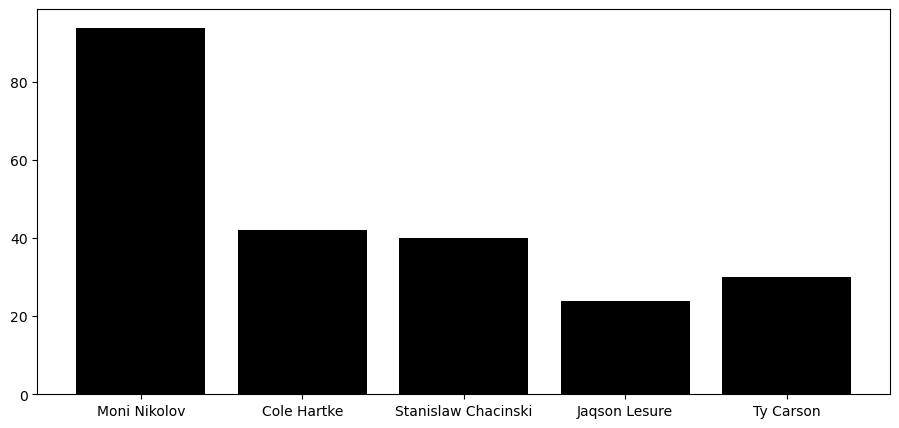

In [72]:
freshman = df[df['Cl'].str.contains('Fr')].drop_duplicates().reset_index(drop = True)

plt.figure(figsize=(11, 5))
plt.bar(freshman['Name'], freshman['Aces'],  color = 'black')

freshman

In [118]:
# we usually will use .3 to .5 for the best serving teams
# will research more on the 

average = df[(df['Per Set'] > .3) & (df['Per Set'] < .5) & (df['Aces'] >= 10) & (df['S'] > int(20))]

average

,Rank,Name,Team,Cl,Height,S,Aces,Per Set
17,18,Trevor Phillips,Catawba,Sr.,6-6,49,24,0.490
18,19,Stanislaw Chacinski,Ohio St.,Fr.,6-7,47,23,0.489
19,20,Aleksandar Sosa,Quincy,So.,6-7,47,23,0.489
20,21,Shane Wetzel,Ohio St.,Jr.,6-7,48,23,0.479
21,22,Cooper Robinson,UCLA,Sr.,6-7,44,21,0.477
22,23,Ryan Barnett,Pepperdine,Jr.,6-5,34,16,0.471
23,24,Chase Celichowski,LIU,Jr.,6-5,30,14,0.467
24,25,Marcus Morgan,CUI,Jr.,6-7,43,20,0.465
25,26,Logan Muir,Purdue Fort Wayne,So.,6-5,43,20,0.465
26,27,Leo Pravednikov,UC San Diego,Jr.,6-4,46,21,0.457


In [48]:
# current status of project: 
# I am looking to do some research on the historcally best teams with their serving percentages and the overall 
# performance of the teams

# Automation should come next given the finalized of formulaic approach I decide to take

In [50]:
# next update, put key on gitignore, and include the internal module folder in git given
# it will be needed in the future of the project
